<a href="https://colab.research.google.com/github/sadiarb22/task-5/blob/main/task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d camnugent/california-housing-prices

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [36]:
!unzip california-housing-prices.zip

unzip:  cannot find or open california-housing-prices.zip, california-housing-prices.zip.zip or california-housing-prices.zip.ZIP.


In [38]:
import pandas as pd
housing_pd = pd.read_csv('housing.csv')
housing_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing_pd['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [39]:
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd),random_state=1)
housing_pd_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [40]:
pd.get_dummies(housing_pd_shuffled['ocean_proximity']).head()



,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


In [41]:
housing_pd_shuffled.drop('ocean_proximity', axis=1).head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [42]:
housing_pd_final= pd.concat([housing_pd_shuffled.drop('ocean_proximity', axis=1),
                            pd.get_dummies (housing_pd_shuffled ['ocean_proximity'])], axis=1)
housing_pd_final


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,1,0,0,0,0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,1,0,0,0,0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,1,0,0,0,0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,0,1,0,0,0


In [43]:
housing_pd_final = housing_pd_final[['longitude',	'latitude',	'housing_median_age'	,
                                     'total_rooms',	'total_bedrooms'	,'population'	,'households',
                                     'median_income',	'median_house_value'	,'<1H OCEAN',	'INLAND',
                                     'ISLAND',	'NEAR BAY',	'NEAR OCEAN']]
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,1,0,0,0,0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,1,0,0,0,0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,1,0,0,0,0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,0,1,0,0,0


In [44]:
housing_pd_final = housing_pd_final.dropna()
len (housing_pd_final)

20433

In [45]:
train_pd,test_pd,val_pd= housing_pd_final[:18000], housing_pd_final[18000:19215], housing_pd_final[19215:]
len(train_pd), len(test_pd), len(val_pd)


(18000, 1215, 1218)

In [46]:
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1215, 13), (1215,))

In [47]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
  A = np.copy(X)
  A[:, :8] = scaler.transform(A[:, :8])
  return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

In [48]:
from sklearn.model_selection import train_test_split
X_train.shape, X_val.shape, X_test.shape


((18000, 13), (1218, 13), (1215, 13))

In [49]:
X_train_preprocessed = pd.DataFrame(data=X_train)

<Axes: >

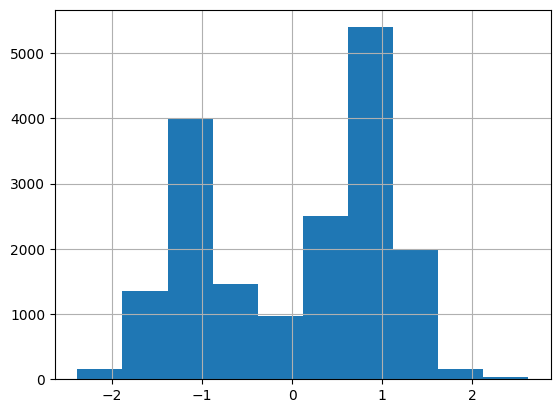

In [50]:
pd.DataFrame(X_train_preprocessed)[0].hist()

In [51]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)
mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val), y_val, squared=False)

(7.143057179825785e-15, 7.247184939114812e-15)

In [52]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
mse(knn.predict(X_train), y_train, squared=False), mse(knn.predict(X_val), y_val, squared=False)

(0.2968707163433642, 0.32335220773377354)

In [53]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10).fit(X_train, y_train)
mse(rfr.predict(X_train), y_train, squared=False), mse(rfr.predict(X_val), y_val, squared=False)

(0.0026457513110645908, 0.009359627517043596)

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train, y_train)
mse(gbr.predict(X_train), y_train, squared=False), mse(gbr.predict(X_val), y_val, squared=False)

(0.005732604380055889, 0.0062994615336907185)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

simple_nn = Sequential()
simple_nn.add(InputLayer((13,)))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/simple_nn', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

In [56]:
from tensorflow.keras.models import load_model

simple_nn = load_model('models/simple_nn')
mse(simple_nn.predict(X_train), y_train, squared=False), mse(simple_nn.predict(X_val), y_val, squared=False)

39/39 [==============================] - 0s 1ms/step


(0.33428449912366853, 0.324344363485156)

In [ ]:
medium_nn = Sequential()
medium_nn.add(InputLayer((13,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/medium_nn', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

In [59]:
medium_nn = load_model('models/medium_nn')
mse(medium_nn.predict(X_train), y_train, squared=False), mse(medium_nn.predict(X_val), y_val, squared=False)

39/39 [==============================] - 0s 2ms/step


(0.3356176872691689, 0.3257662704572374)

In [ ]:
large_nn = Sequential()
large_nn.add(InputLayer((13,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/large_nn', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

In [61]:
large_nn = load_model('models/large_nn')
mse(large_nn.predict(X_train), y_train, squared=False), mse(large_nn.predict(X_val), y_val, squared=False)

39/39 [==============================] - 0s 2ms/step


(0.3355833522879208, 0.3257694330664504)

In [62]:
mse(gbr.predict(X_test), y_test, squared=False)

0.006471829543508547